In [1]:
from src.processing_data import processing_all_data, create_folders
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import plotly.graph_objects as go
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
plt.style.use('properties.mplstyle')
import numpy as np
import matplotlib as mpl
from IPython.display import clear_output 
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # opcional
    "axes.unicode_minus": False,              # para "-" correto em LaTeX
})

In [2]:
results_folder = "../../Results/"
properties_folder = results_folder + "properties/"
shortest_path  = properties_folder + "shoretest_path/"
assortativity_path = properties_folder + "assortativity/"
lst_create_all = [results_folder, properties_folder, shortest_path, assortativity_path]
for folders in lst_create_all:
    create_folders(folders)

Directory '../../Results/' ensured to exist.
Directory '../../Results/properties/' ensured to exist.
Directory '../../Results/properties/shoretest_path/' ensured to exist.
Directory '../../Results/properties/assortativity/' ensured to exist.


In [5]:
# processing_data
processing_all_data("../../data")
clear_output()

In [3]:
df = pd.read_csv("../../data/all_data.csv", sep=',')
df

,N,m0,dim,alpha_a,alpha_g,N_samples,Short_Cost_mean,Short_Cost_error,Short_BFS_mean,Short_BFS_error,R_Spearman_mean,R_Spearman_error,R_Newman_mean,R_Newman_error,ClusterCoefficient_mean,ClusterCoefficient_error
0,131072,2,1,0.0,2.0,11,6.156176,0.050776,5.995403,0.010487,0.286269,0.001646,-0.019361,0.002061,0.000598,0.000032
1,131072,2,1,1.0,2.0,11,2.741658,0.006697,6.678534,0.017627,0.306807,0.001629,-0.020456,0.003120,0.027528,0.000129
2,131072,2,1,2.0,1.0,112,31.749291,2.256164,9.897085,0.023250,0.419327,0.000416,0.106054,0.000944,0.375039,0.000124
3,131072,2,1,2.0,2.0,11,2.702028,0.010433,10.005388,0.026806,0.420642,0.001353,0.109811,0.002896,0.377341,0.000333
4,131072,2,1,2.0,3.0,11,1.872412,0.027835,10.264545,0.048833,0.421176,0.001241,0.109157,0.002793,0.377025,0.000323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,8192,2,4,5.0,2.0,601,4.525885,0.005537,5.668771,0.002199,0.338269,0.000785,-0.023159,0.000962,0.102881,0.000143
428,8192,2,4,6.0,2.0,601,4.478837,0.004030,6.088345,0.002276,0.369767,0.000782,0.016742,0.001018,0.155675,0.000171
429,8192,2,4,7.0,2.0,601,4.466564,0.003422,6.437145,0.002490,0.392480,0.000778,0.051483,0.001087,0.201056,0.000180
430,8192,2,4,8.0,2.0,602,4.474553,0.004607,6.711514,0.002655,0.407676,0.000766,0.078236,0.001125,0.233656,0.000190


In [37]:
N = [2**i for i in range(12, 18)]
for n in N:
    ns = df[df["N"]==n]["N_samples"].unique()
    print(ns)

[  901 10902   908   909 10911 10900]
[ 601 5603 5601 5602  602 5604]
[ 301 2801 2802]
[ 101 1102  193  211   97  217  417]
[ 51  55 498 379 487 448  76  33 494 491 161 474]
[ 11 112  12  97  77 111  74  44  16  94  86]


## SHOREST PATH (DIJSTRIKA) -- $\alpha_A$

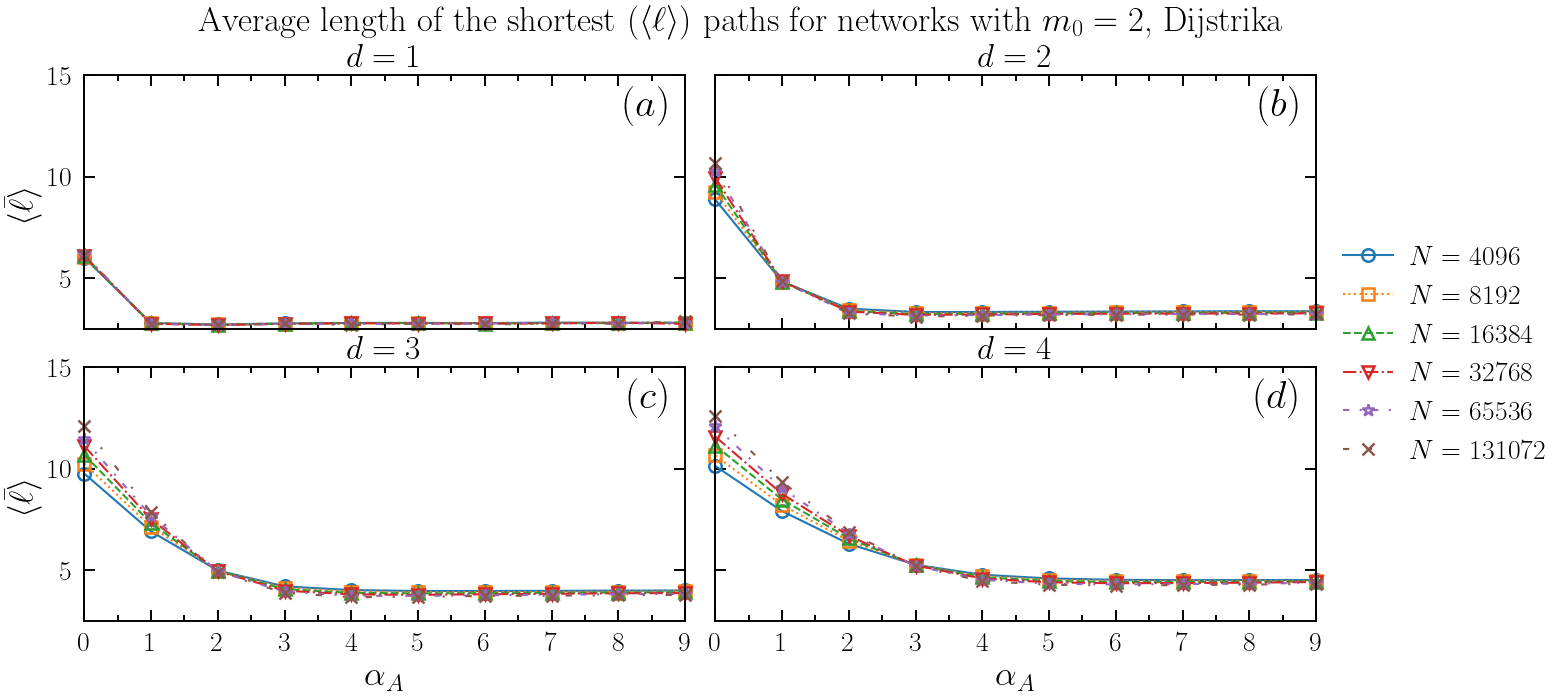

In [15]:
fig, axes = plt.subplots(2,2, figsize=(16,7), sharey=True)
plt.subplots_adjust(
    left=0.09,   # margem esquerda
    right=0.86,  # reserva ~14% para a legenda à direita
    bottom=0.12,
    top=0.90,
    wspace=0.05,
    hspace=0.15
)

fs_labels = 25
fs_ticks = 20

N = [2**i for i in range(12, 18)]
dim = [1,2,3,4]
m0 = 2
alpha_ag_f = 2.0

labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

labels_fig = ["$(a)$", "$(b)$",
             "$(c)$", "$(d)$"]

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_g"]==alpha_ag_f)].sort_values("alpha_a")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_a"], df_N["Short_Cost_mean"],
                marker=markers[idx_n],ls=ls[idx_n],ms=ms, mew=mew ,color=colors[idx_n],
                clip_on=False)
    
    ax.set_xlim(0, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                   length=4, width=thickness_axes, direction='in')
    ax.set_ylim(2.5, 15)
    ax.text(0.98, 0.80, labels_fig[idx],
        transform=ax.transAxes, ha='right', va='bottom', fontsize=29)

# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_A$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(
    labels=labels,
    loc="center left",
    bbox_to_anchor=(0.87, 0.5),  # dentro do espaço reservado por 'right=0.86'
    fontsize=20,
    frameon=False,
    borderaxespad=0.0,
    handlelength=1.8,
    handletextpad=0.6
)

fig.suptitle(
    fr"Average length of the shortest ($\langle \ell \rangle$) paths for networks with $m_0 = {m0}$, Dijstrika",
    fontsize=25, fontweight='bold', y=1.0
)

plt.savefig(
    shortest_path + "shortest_dijstrika_alpha_a.pdf",
    bbox_inches="tight",
    pad_inches=0.02,
    transparent=True
)
plt.show()

## SHOREST PATH (DIJSTRIKA) -- $\alpha_G$

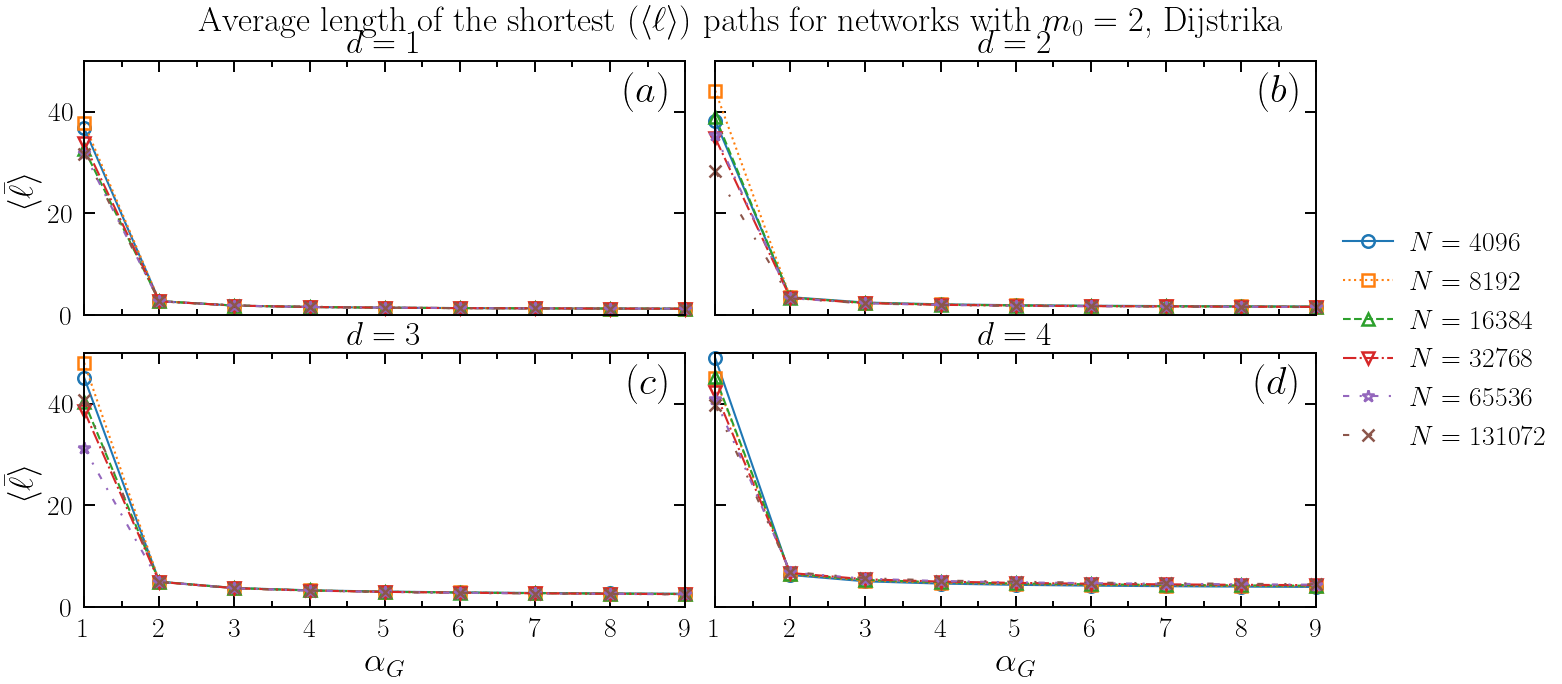

In [16]:
# mudar para (16,9)
fig, axes = plt.subplots(2,2, figsize=(16,7), sharey=True)
plt.subplots_adjust(
    left=0.09,   # margem esquerda
    right=0.86,  # reserva ~14% para a legenda à direita
    bottom=0.12,
    top=0.90,
    wspace=0.05,
    hspace=0.15
)

fs_labels = 25
fs_ticks = 20

N = [2**i for i in range(12, 18)]
dim = [1,2,3,4]
m0 = 2
alpha_ag_f = 2.0

labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

labels_fig = ["$(a)$", "$(b)$",
             "$(c)$", "$(d)$"]

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_a"]==alpha_ag_f)].sort_values("alpha_g")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_g"], df_N["Short_Cost_mean"],
                marker=markers[idx_n],ls=ls[idx_n], ms=ms, mew=mew,
                color=colors[idx_n], clip_on=False)
    
    ax.set_xlim(1, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                   length=4, width=thickness_axes, direction='in')
    ax.set_ylim(0,50)
    ax.text(0.98, 0.80, labels_fig[idx],
    transform=ax.transAxes, ha='right', va='bottom', fontsize=29)

# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_G$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(
    labels=labels,
    loc="center left",
    bbox_to_anchor=(0.87, 0.5),  # dentro do espaço reservado por 'right=0.86'
    fontsize=20,
    frameon=False,
    borderaxespad=0.0,
    handlelength=1.8,
    handletextpad=0.6
)

fig.suptitle(
    fr"Average length of the shortest ($\langle \ell \rangle$) paths for networks with $m_0 = {m0}$, Dijstrika",
    fontsize=25, fontweight='bold'
)

plt.savefig(
    shortest_path + "shortest_dijstrika_alpha_g.pdf",
    bbox_inches="tight",
    pad_inches=0.02,
    transparent=True
)
plt.show()

## ASSORTATIVITY COEFFICIENT (SPEARMAN) -- $\alpha_A$

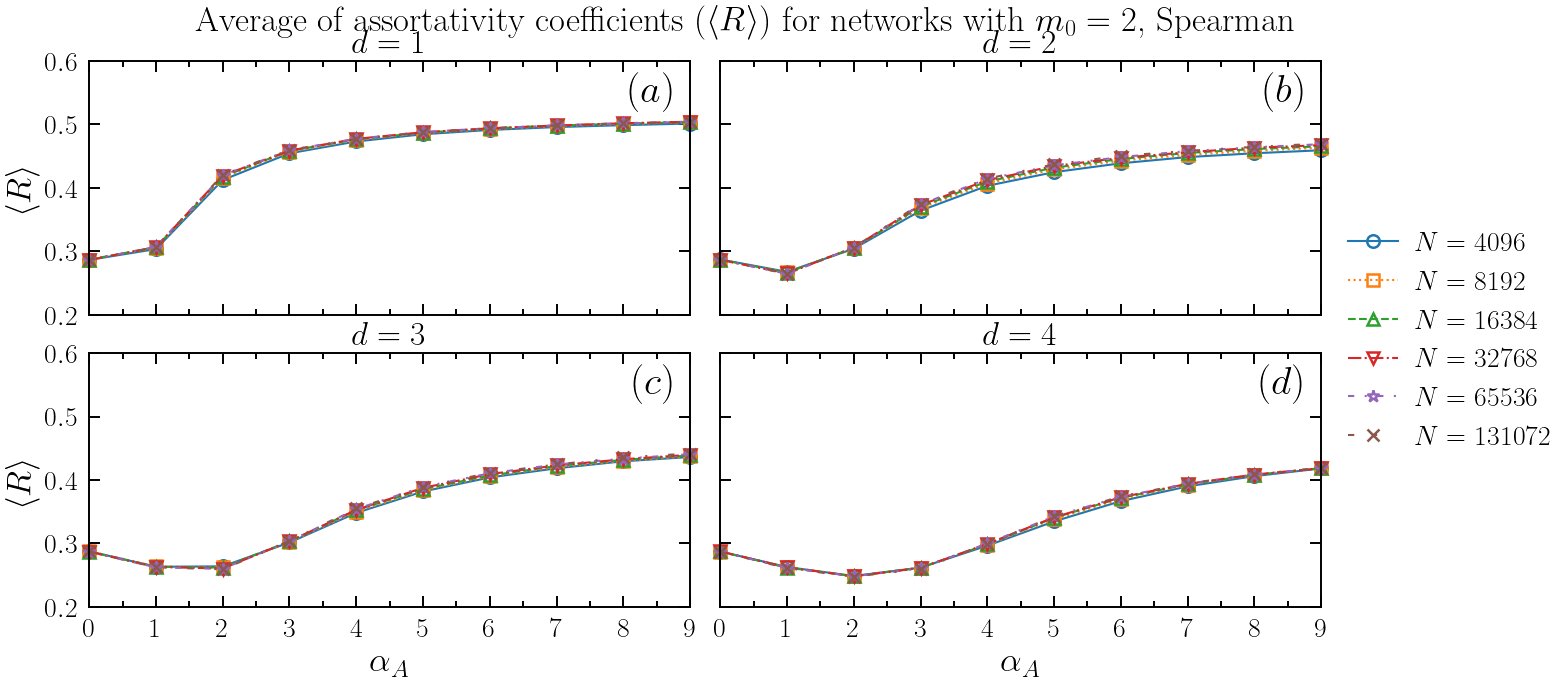

In [17]:
# mudar para (16,9)
fig, axes = plt.subplots(2,2, figsize=(16,7), sharey=True)
plt.subplots_adjust(
    left=0.09,   # margem esquerda
    right=0.86,  # reserva ~14% para a legenda à direita
    bottom=0.12,
    top=0.90,
    wspace=0.05,
    hspace=0.15
)

fs_labels = 25

N = [2**i for i in range(12, 18)]
dim = [1,2,3,4]
m0 = 2
alpha_ag_f = 2.0

labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


labels_fig = ["$(a)$", "$(b)$",
             "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

fs_ticks = 20

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_g"]==alpha_ag_f)].sort_values("alpha_a")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_a"], df_N["R_Spearman_mean"],
                marker=markers[idx_n],ls=ls[idx_n], ms=ms, mew=mew, color=colors[idx_n],
                clip_on=False)
    
    
    ax.set_xlim(0, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                    length=4, width=thickness_axes, direction='in')
    ax.set_ylim(0.20, 0.6)
    
    ax.text(0.98, 0.80, labels_fig[idx],
        transform=ax.transAxes, ha='right', va='bottom', fontsize=29)
# ---- Y: mostrar números só na 1ª coluna ----
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle R \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_A$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(
    labels=labels,
    loc="center left",
    bbox_to_anchor=(0.87, 0.5),  # dentro do espaço reservado por 'right=0.86'
    fontsize=20,
    frameon=False,
    borderaxespad=0.0,
    handlelength=1.8,
    handletextpad=0.6
)


fig.suptitle(fr"Average of assortativity coefficients ($\langle R \rangle$) for networks with $m_0 = {m0}$, Spearman", fontsize=25, fontweight='bold') # Adds a title to the entire figure
plt.savefig(
    assortativity_path + "R_spearman_alpha_a.pdf",
    bbox_inches="tight",
    pad_inches=0.02,
    transparent=True
)

plt.show()

## ASSORTATIVITY COEFFICIENT (SPEARMAN) -- $\alpha_G$

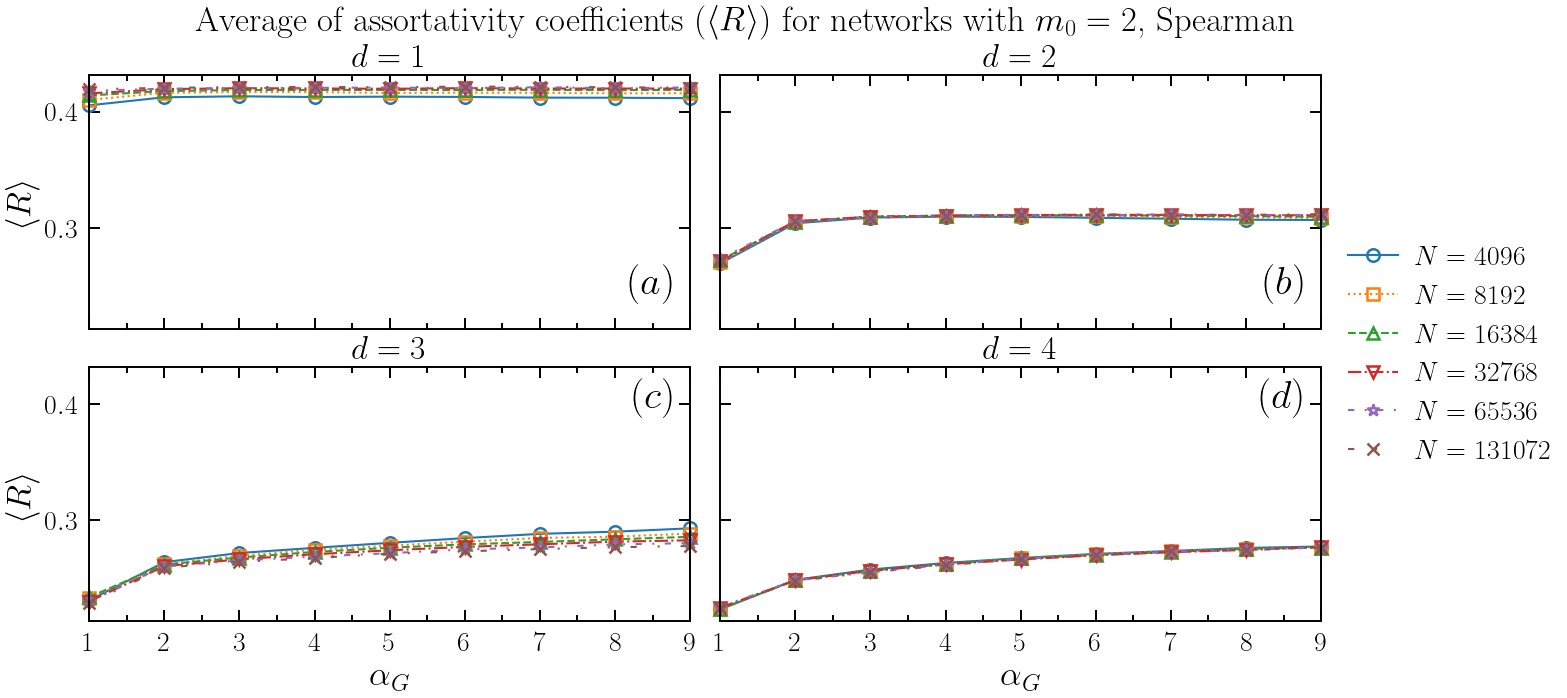

In [18]:
# mudar para (16,9)
fig, axes = plt.subplots(2,2, figsize=(16,7), sharey=True)
plt.subplots_adjust(
    left=0.09,   # margem esquerda
    right=0.86,  # reserva ~14% para a legenda à direita
    bottom=0.12,
    top=0.90,
    wspace=0.05,
    hspace=0.15
)
fs_labels = 25
N = [2**i for i in range(12, 18)]
m0 = 2
alpha_ag_f = 2.0

dim = [1,2,3,4]
labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


labels_fig = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8
fs_ticks = 20

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_a"]==alpha_ag_f)].sort_values("alpha_g")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_g"], df_N["R_Spearman_mean"],marker=markers[idx_n],
                mew=mew, ms=ms, ls=ls[idx_n], color=colors[idx_n],
                clip_on=False)
    
    ax.set_xlim(1, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                    length=4, width=thickness_axes, direction='in')
    if(idx <= 1):
        pos_x, pos_y = 0.98, 0.10
    else:
        pos_x, pos_y = 0.98, 0.80

    ax.text(pos_x, pos_y, labels_fig[idx],
        transform=ax.transAxes, ha='right', va='bottom', fontsize=29)
# ---- Y: mostrar números só na 1ª coluna ----
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle R \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_G$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(
    labels=labels,
    loc="center left",
    bbox_to_anchor=(0.87, 0.5),  # dentro do espaço reservado por 'right=0.86'
    fontsize=20,
    frameon=False,
    borderaxespad=0.0,
    handlelength=1.8,
    handletextpad=0.6
)


fig.suptitle(fr"Average of assortativity coefficients ($\langle R \rangle$) for networks with $m_0 = {m0}$, Spearman", fontsize=25, fontweight='bold',y=1.0) # Adds a title to the entire figure
plt.savefig(
    assortativity_path + "R_spearman_alpha_g.pdf",
    bbox_inches="tight",
    pad_inches=0.02,
    transparent=True
)

plt.show()

## SHOREST PATH (BFS) -- $\alpha_A$

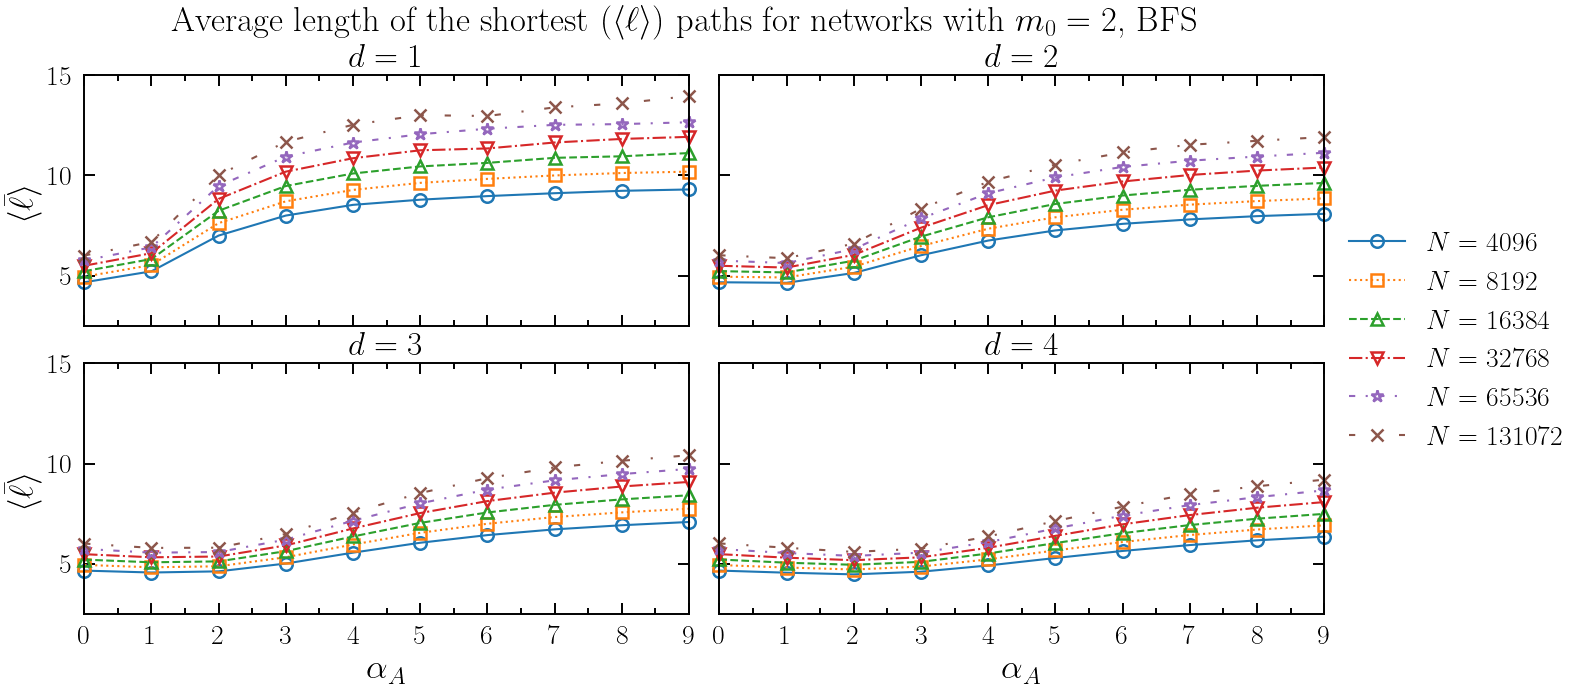

In [42]:
fig, axes = plt.subplots(2,2, figsize=(16,7), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25
fs_ticks = 20

N = [2**i for i in range(12, 18)]
dim = [1,2,3,4]
m0 = 2
alpha_ag_f = 2.0

labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_g"]==alpha_ag_f)].sort_values("alpha_a")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_a"], df_N["Short_BFS_mean"], marker=markers[idx_n],ls=ls[idx_n], 
                mew=mew, ms=ms, color=colors[idx_n],
                clip_on=False)
    
    ax.set_xlim(0, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                   length=4, width=thickness_axes, direction='in')
    ax.set_ylim(2.5, 15)
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_A$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.9, 0.5), fontsize=20)
fig.suptitle(fr"Average length of the shortest ($\langle \ell \rangle$) paths for networks with $m_0 = {m0}$, BFS", fontsize=25, fontweight='bold') # Adds a title to the entire figure
# plt.savefig(shortest_path + "shortest_BFS_alpha_a.pdf")
plt.show()

## SHOREST PATH (BFS) -- $\alpha_G$

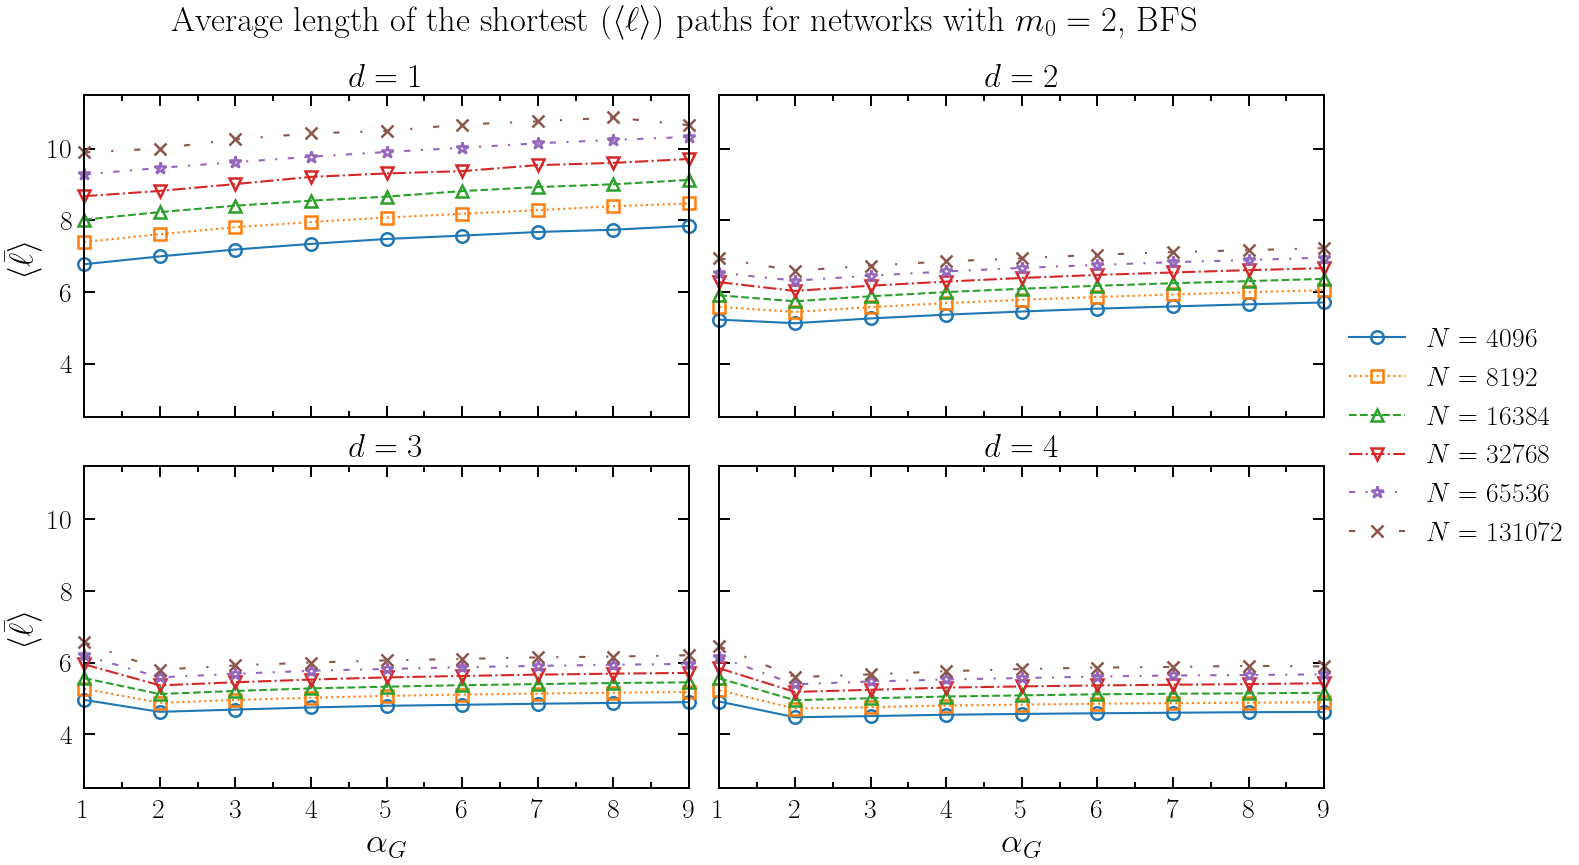

In [21]:
fig, axes = plt.subplots(2,2, figsize=(16,9), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25
fs_ticks = 20

N = [2**i for i in range(12, 18)]
dim = [1,2,3,4]
m0 = 2
alpha_ag_f = 2.0

labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_a"]==alpha_ag_f)].sort_values("alpha_g")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_g"], df_N["Short_BFS_mean"], marker=markers[idx_n],ls=ls[idx_n], 
                mew=mew, ms=ms, color=colors[idx_n],
                clip_on=False)
    
    ax.set_xlim(1, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                   length=4, width=thickness_axes, direction='in')
    ax.set_ylim(2.5, 11.5)
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_G$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.9, 0.5), fontsize=20)
fig.suptitle(fr"Average length of the shortest ($\langle \ell \rangle$) paths for networks with $m_0 = {m0}$, BFS", fontsize=25, fontweight='bold') # Adds a title to the entire figure
plt.savefig(shortest_path + "shortest_BFS_alpha_g.pdf")
plt.show()

## NUMBER OF NODES (N) ANALYSIS -- $\alpha_A$

In [22]:
df.head()

,N,m0,dim,alpha_a,alpha_g,N_samples,Short_Cost_mean,Short_Cost_error,Short_BFS_mean,Short_BFS_error,R_Spearman_mean,R_Spearman_error,R_Newman_mean,R_Newman_error,ClusterCoefficient_mean,ClusterCoefficient_error
0,131072,2,1,0.0,2.0,11,6.156176,0.050776,5.995403,0.010487,0.286269,0.001646,-0.019361,0.002061,0.000598,0.000032
1,131072,2,1,1.0,2.0,11,2.741658,0.006697,6.678534,0.017627,0.306807,0.001629,-0.020456,0.003120,0.027528,0.000129
2,131072,2,1,2.0,1.0,112,31.749291,2.256164,9.897085,0.023250,0.419327,0.000416,0.106054,0.000944,0.375039,0.000124
3,131072,2,1,2.0,2.0,11,2.702028,0.010433,10.005388,0.026806,0.420642,0.001353,0.109811,0.002896,0.377341,0.000333
4,131072,2,1,2.0,3.0,11,1.872412,0.027835,10.264545,0.048833,0.421176,0.001241,0.109157,0.002793,0.377025,0.000323


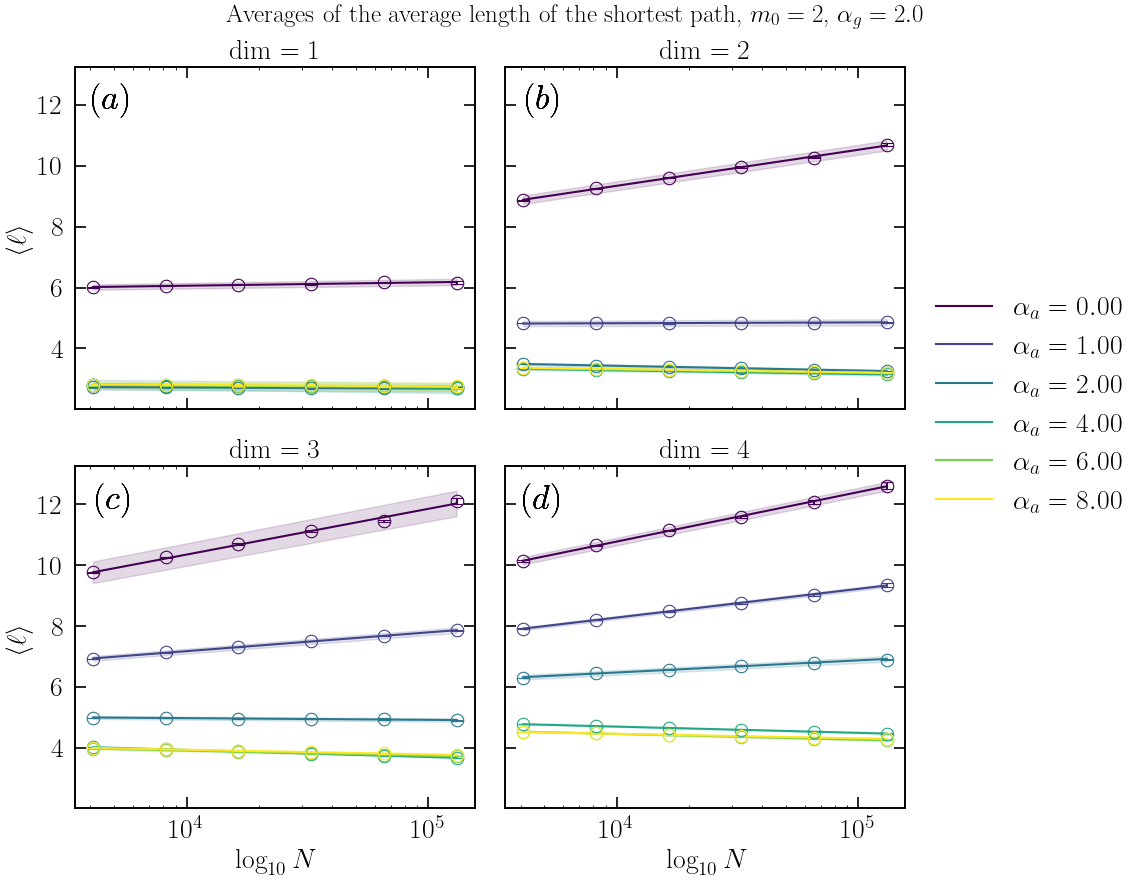

In [ ]:
from scipy.odr import ODR, Model, RealData

def linear_model(beta, x):
    """Modelo linear: y = A*x + B"""
    A, B = beta
    return A * x + B

def regressao_com_erro_y(x, y, y_err):
    """
    Faz regressão linear y = A*x + B considerando erro em y (y_err).

    Parâmetros
    ----------
    x : array-like
        Valores de x.
    y : array-like
        Valores medidos de y.
    y_err : array-like
        Incertezas (desvios-padrão) associadas a y.

    Retorna
    -------
    dict com:
        A, B            : parâmetros ajustados
        A_err, B_err    : incertezas (1σ) dos parâmetros
        cov_beta        : matriz de covariância dos parâmetros
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    y_err = np.asarray(y_err, dtype=float)

    # dados com erro em y (sy)
    data = RealData(x, y, sy=y_err)

    model = Model(linear_model)

    # chute inicial para [A, B]
    beta0 = [1.0, 0.0]

    odr = ODR(data, model, beta0=beta0)
    out = odr.run()

    A, B = out.beta
    A_err, B_err = out.sd_beta
    cov_beta = out.cov_beta

    return {
        "A": A,
        "B": B,
        "A_err": A_err,
        "B_err": B_err,
        "cov_beta": cov_beta,
        "odr_output": out
    }


# supondo que regressao_com_erro_y já esteja definida

N_list = [2**i for i in range(12, 18)]  # 2^12 ... 2^17
dim_list = [1, 2, 3, 4]
m0 = 2
alpha_ag_f = 2.0

# lista de alpha_a (pegando para N=2^12 só para ter o conjunto)
#alpha_a_filter = df[df["N"] == 2**12]['alpha_a'].unique()
alpha_a_filter = [0.0, 1.0, 2.0, 4.0, 6.0, 8.0]
alpha_a_filter = np.sort(alpha_a_filter)

# cores fixas por alpha_a (para serem consistentes entre subplots)
cmap = plt.cm.viridis
colors = {
    alpha_a: cmap(i / max(1, len(alpha_a_filter) - 1))
    for i, alpha_a in enumerate(alpha_a_filter)
}

parameters = {"dim": [], "alpha_a": [], "A": [], "A_err": [], "B": [], "B_err": []}

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.ravel()

legend_proxies = {}  # para construir a legenda global
labels_fig = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]
fs_label = 20

for ax, dim_val in zip(axes, dim_list):
    for alpha_a in alpha_a_filter:
        # filtra dados
        df_filter = df[
            (df["m0"] == m0) &
            (df["dim"] == dim_val) &
            (df["alpha_g"] == alpha_ag_f) &
            (df["alpha_a"] == alpha_a)
        ].sort_values("N")

        if df_filter.empty:
            continue

        N_vals = df_filter["N"].to_numpy()
        x = np.log10(N_vals)

        y = df_filter["Short_Cost_mean"].to_numpy()
        y_err = df_filter["Short_Cost_error"].to_numpy()

        # regressão: y = A * log10(N) + B
        res = regressao_com_erro_y(x, y, y_err)
        A, B = res["A"], res["B"]
        A_err, B_err = res["A_err"], res["B_err"]

        parameters["dim"].append(dim_val)
        parameters["alpha_a"].append(alpha_a)
        parameters["A"].append(A)
        parameters["A_err"].append(A_err)
        parameters["B"].append(B)
        parameters["B_err"].append(B_err)

        color = colors[alpha_a]

        # pontos com barras de erro
        eb = ax.errorbar(
            N_vals, y, yerr=y_err,
            fmt='o', capsize=4, color=color,
            label=fr'$\alpha_A={alpha_a:.2f}$'
        )

        # reta de ajuste + banda de erro
        N_line = np.logspace(np.log10(N_vals.min()), np.log10(N_vals.max()), 200)
        x_line = np.log10(N_line)
        y_fit = A * x_line + B
        sigma_y = np.sqrt((x_line * A_err)**2 + B_err**2)

        line, = ax.plot(N_line, y_fit, '-', color=color)
        ax.fill_between(N_line, y_fit - sigma_y, y_fit + sigma_y,
                        color=color, alpha=0.15)

        # guarda um proxy para a legenda global (uma vez por alpha_a)
        if alpha_a not in legend_proxies:
            legend_proxies[alpha_a] = line

    ax.set_xscale('log')
    ax.set_yscale('linear')  # ou log, se quiser manter como antes
    ax.set_title(fr'dim $= {dim_val}$', fontsize=20)
    ax.tick_params(axis='both', which='major', direction='in', length=8, width=1.2)
    
    axes2d = axes.reshape(2, 2)

    for row in range(2):
        axes2d[row, 0].set_ylabel(r'$\langle \ell \rangle$', fontsize=fs_label)

    for col in range(2):
        axes2d[1, col].set_xlabel(r'$\log_{10}{N}$', fontsize=fs_label)
    for row in range(2):
        for col in range(2):
            axes2d[row, col].text(0.15, 0.85, labels_fig[2*row + col],
                transform=axes2d[row, col].transAxes, ha='right', va='bottom', fontsize=25)
# labels globais
#fig.supxlabel(r'$N$', fontsize=18)
#fig.supylabel(r'$\langle \mathrm{Short\_Cost} \rangle$', fontsize=18)

# legenda global à direita
handles = [legend_proxies[a] for a in alpha_a_filter if a in legend_proxies]
labels = [fr'$\alpha_a={a:.2f}$' for a in alpha_a_filter if a in legend_proxies]

fig.legend(handles, labels,
           loc='center left', bbox_to_anchor=(0.78, 0.5),
           frameon=False, fontsize=20)

fig.suptitle(fr'Averages of the average length of the shortest path, $m_0={m0}$, $\alpha_g={alpha_ag_f}$', fontsize=18, fontweight='bold',y=0.9)

plt.tight_layout(rect=[0, 0, 0.8, 0.95])  # deixa espaço para legenda à direita e título
plt.show()

# se quiser ver os parâmetros:
params_df = pd.DataFrame(parameters)

## NUMBER OF NODES (N) ANALYSIS -- $\alpha_G$

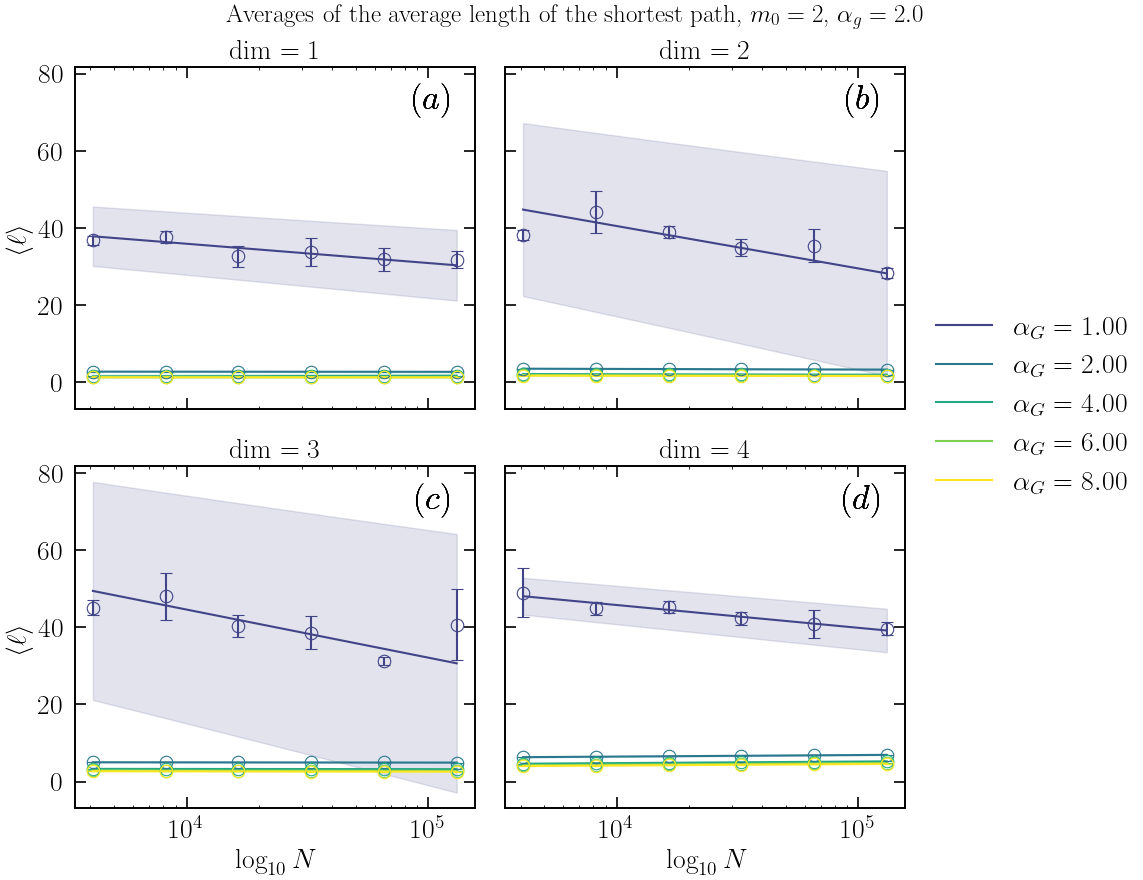

,dim,alpha_g,A,A_err,B,B_err
0,1,1.0,-5.003742,1.363588,55.922488,5.934640
1,1,2.0,-0.034361,0.014882,2.854711,0.065285
2,1,4.0,0.090103,0.074485,1.176709,0.325011
3,1,6.0,-0.008931,0.004335,1.383166,0.018420
4,1,8.0,-0.008489,0.004265,1.292310,0.018134
5,2,1.0,-11.005554,3.942043,84.526649,17.358633
6,2,2.0,-0.155819,0.007044,4.052980,0.030959
7,2,4.0,-0.100539,0.003517,2.451112,0.015458
8,2,6.0,-0.085297,0.003297,2.119700,0.014490
9,2,8.0,-0.077564,0.002527,1.973963,0.011106


In [ ]:
from scipy.odr import ODR, Model, RealData

def linear_model(beta, x):
    """Modelo linear: y = A*x + B"""
    A, B = beta
    return A * x + B

def regressao_com_erro_y(x, y, y_err):
    """
    Faz regressão linear y = A*x + B considerando erro em y (y_err).

    Parâmetros
    ----------
    x : array-like
        Valores de x.
    y : array-like
        Valores medidos de y.
    y_err : array-like
        Incertezas (desvios-padrão) associadas a y.

    Retorna
    -------
    dict com:
        A, B            : parâmetros ajustados
        A_err, B_err    : incertezas (1σ) dos parâmetros
        cov_beta        : matriz de covariância dos parâmetros
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    y_err = np.asarray(y_err, dtype=float)

    # dados com erro em y (sy)
    data = RealData(x, y, sy=y_err)

    model = Model(linear_model)

    # chute inicial para [A, B]
    beta0 = [1.0, 0.0]

    odr = ODR(data, model, beta0=beta0)
    out = odr.run()

    A, B = out.beta
    A_err, B_err = out.sd_beta
    cov_beta = out.cov_beta

    return {
        "A": A,
        "B": B,
        "A_err": A_err,
        "B_err": B_err,
        "cov_beta": cov_beta,
        "odr_output": out
    }

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# supondo que regressao_com_erro_y já esteja definida

N_list = [2**i for i in range(12, 18)]  # 2^12 ... 2^17
dim_list = [1, 2, 3, 4]
m0 = 2
alpha_ag_f = 2.0

# lista de alpha_a (pegando para N=2^12 só para ter o conjunto)
#alpha_a_filter = df[df["N"] == 2**12]['alpha_a'].unique()
alpha_g_filter = [1.0, 2.0, 4.0, 6.0, 8.0]
alpha_g_filter = np.sort(alpha_a_filter)

# cores fixas por alpha_a (para serem consistentes entre subplots)
cmap = plt.cm.viridis
colors = {
    alpha_a: cmap(i / max(1, len(alpha_g_filter) - 1))
    for i, alpha_a in enumerate(alpha_g_filter)
}

parameters = {"dim": [], "alpha_g": [], "A": [], "A_err": [], "B": [], "B_err": []}

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.ravel()

legend_proxies = {}  # para construir a legenda global
labels_fig = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]
fs_label = 20

for ax, dim_val in zip(axes, dim_list):
    for alpha_g in alpha_g_filter:
        # filtra dados
        df_filter = df[
            (df["m0"] == m0) &
            (df["dim"] == dim_val) &
            (df["alpha_g"] == alpha_g) &
            (df["alpha_a"] == alpha_ag_f)
        ].sort_values("N")

        if df_filter.empty:
            continue

        N_vals = df_filter["N"].to_numpy()
        x = np.log10(N_vals)

        y = df_filter["Short_Cost_mean"].to_numpy()
        y_err = df_filter["Short_Cost_error"].to_numpy()

        # regressão: y = A * log10(N) + B
        res = regressao_com_erro_y(x, y, y_err)
        A, B = res["A"], res["B"]
        A_err, B_err = res["A_err"], res["B_err"]

        parameters["dim"].append(dim_val)
        parameters["alpha_g"].append(alpha_g)
        parameters["A"].append(A)
        parameters["A_err"].append(A_err)
        parameters["B"].append(B)
        parameters["B_err"].append(B_err)

        color = colors[alpha_g]

        # pontos com barras de erro
        eb = ax.errorbar(
            N_vals, y, yerr=y_err,
            fmt='o', capsize=4, color=color,
            label=fr'$\alpha_G={alpha_a:.2f}$'
        )

        # reta de ajuste + banda de erro
        N_line = np.logspace(np.log10(N_vals.min()), np.log10(N_vals.max()), 200)
        x_line = np.log10(N_line)
        y_fit = A * x_line + B
        sigma_y = np.sqrt((x_line * A_err)**2 + B_err**2)

        line, = ax.plot(N_line, y_fit, '-', color=color)
        ax.fill_between(N_line, y_fit - sigma_y, y_fit + sigma_y,
                        color=color, alpha=0.15)

        # guarda um proxy para a legenda global (uma vez por alpha_a)
        if alpha_a not in legend_proxies:
            legend_proxies[alpha_g] = line

    ax.set_xscale('log')
    ax.set_yscale('linear')  # ou log, se quiser manter como antes
    ax.set_title(fr'dim $= {dim_val}$', fontsize=20)
    ax.tick_params(axis='both', which='major', direction='in', length=8, width=1.2)
    
    axes2d = axes.reshape(2, 2)

    for row in range(2):
        axes2d[row, 0].set_ylabel(r'$\langle \ell \rangle$', fontsize=fs_label)

    for col in range(2):
        axes2d[1, col].set_xlabel(r'$\log_{10}{N}$', fontsize=fs_label)
    
    for row in range(2):
        for col in range(2):
            axes2d[row, col].text(0.95, 0.85, labels_fig[2*row + col],
                transform=axes2d[row, col].transAxes, ha='right', va='bottom', fontsize=25)


# legenda global à direita
handles = [legend_proxies[a] for a in alpha_a_filter if a in legend_proxies]
labels = [fr'$\alpha_G={a:.2f}$' for a in alpha_a_filter if a in legend_proxies]

fig.legend(handles, labels,
           loc='center left', bbox_to_anchor=(0.78, 0.5),
           frameon=False, fontsize=20)

fig.suptitle(fr'Averages of the average length of the shortest path, $m_0={m0}$, $\alpha_g={alpha_ag_f}$', 
             fontsize=18, fontweight='bold',y=0.9)

plt.tight_layout(rect=[0, 0, 0.8, 0.95])  # deixa espaço para legenda à direita e título
plt.show()

# se quiser ver os parâmetros:
params_df = pd.DataFrame(parameters)
params_df